In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
df = pd.read_csv("D:\Academic\Summer sem\Data Analytics programming\Project\Crime_cleaned.csv")

In [12]:
df["Occurance_year"] = df["Occurred Date"].map(lambda x: x[-4:])

In [13]:
df.isna().sum()
df["Month"] =df["Occurred Date"].map(lambda x:x.split("/")[0])

In [15]:
#divide into day and night
def daynight(x):
    if x >=2200 or x<=600:
        y= "Night"
    else:
        y="Day"
    return y    
# df_2018["DayNight"]=df_2018["Occurred Time"].map(daynight)
# df_2018["DayNight"].value_counts().plot(kind="bar",color ="c")

In [16]:
def day(x):
    if x >=2200 or x<=600:
        y= "Night"
    elif x<=1200:
        y="Day(before Noon)"
    else:
        y="Day(after Noon)"
    return y 

# df_2018["Day"]=df_2018["Occurred Time"].map(day)
# df_2018["Day"].value_counts().plot(kind="bar",color = "c")

In [20]:
cl = df[["APD Sector","Zip Code","Location Type","Category Description",'Report Time','Report Date',"Occurred Date","Occurred Time"]]

In [21]:
# consider 8,9,10 of year 2018

In [22]:
cl["Occurred_year"] = df["Occurred Date"].map(lambda x: x[-4:])
cl["Month"] =df["Occurred Date"].map(lambda x:x.split("/")[0])
cl["Day"] =df["Occurred Date"].map(lambda x:x.split("/")[1])

from datetime import date
from datetime import datetime
df['Occurred Date']= pd.to_datetime(df['Occurred Date']) 


def name(s):
    return s.month
cl["Month_names"] = df["Occurred Date"].map(name)

C:\Users\sayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [23]:

#df_a = df[df["APD Sector"].isin(df_2018["APD Sector"].unique())]
# mask1 = df["Occurance_year"]!="2018"
# mask2 = df["Occurance_year"]!="2019"
# mask = mask1 & mask2
# df_all = df_a[mask]

C:\Users\sayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


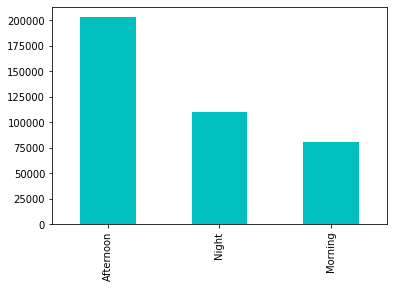

In [24]:
def day(x):
    if x >=2200 or x<=600:
        y= "Night"
    elif x<=1200:
        y="Morning"
    else:
        y="Afternoon"
    return y 

cl["Day_Night"]=cl["Occurred Time"].map(day)
cl["Day_Night"].value_counts().plot(kind="bar",color = "c")

In [25]:
#take only 3 months - 8,9,10



from datetime import date
from datetime import datetime
cl['Occurred Date']= pd.to_datetime(cl['Occurred Date']) 

df.dtypes

import calendar
def whichday(x):
    return calendar.day_name[x.weekday()]       


cl["dayofweek"] = cl["Occurred Date"].map(whichday)

C:\Users\sayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\sayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [26]:
cl_2018 = cl[cl["Occurred_year"]=="2018"]
fin_cl = cl_2018[["Category Description","APD Sector","Zip Code","Location Type","Month","Day_Night","dayofweek"]]

In [27]:
data =cl[["Category Description","APD Sector","Zip Code","Location Type","Month","Day_Night","dayofweek","Occurred_year","Month_names"]]        

In [28]:
pd.crosstab(cl_2018["APD Sector"],cl_2018["Category Description"]).iloc[1:]

Category Description,Aggravated Assault,Auto Theft,Burglary,Murder,Rape,Robbery,Theft
APD Sector,,,,,,,
AD,179,249,521,3,71,76,4051
AP,0,22,0,0,0,0,144
BA,99,285,396,2,73,58,3281
CH,277,207,373,4,49,107,1756
DA,205,371,555,2,78,74,4139
ED,340,325,620,7,98,185,3126
FR,310,326,553,4,89,80,2799
GE,138,119,160,0,60,103,2211
HE,255,280,480,4,82,157,2357


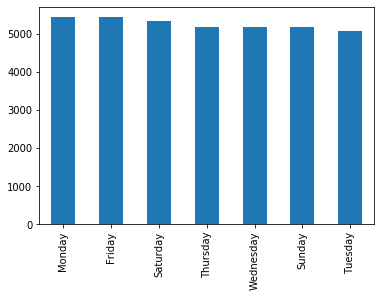

In [29]:
cl_2018["dayofweek"].value_counts().plot(kind="bar")

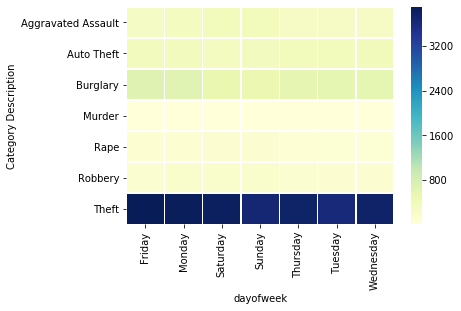

In [30]:
sns.heatmap(pd.crosstab(cl_2018["Category Description"],cl_2018["dayofweek"]),linewidths=0.5,cmap="YlGnBu")

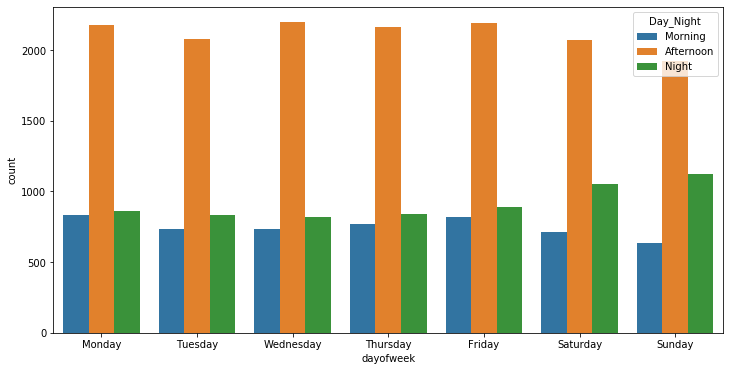

In [31]:
import matplotlib.pyplot as plt
mask=cl_2018["Category Description"]=="Theft" 
# mask = cl_2018["Category Description"]=="Burglary"
# mask = mask1 | mask2
cl_2018_theft = cl_2018[mask]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="dayofweek", hue="Day_Night",data=cl_2018_theft, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],hue_order =["Morning","Afternoon","Night"])

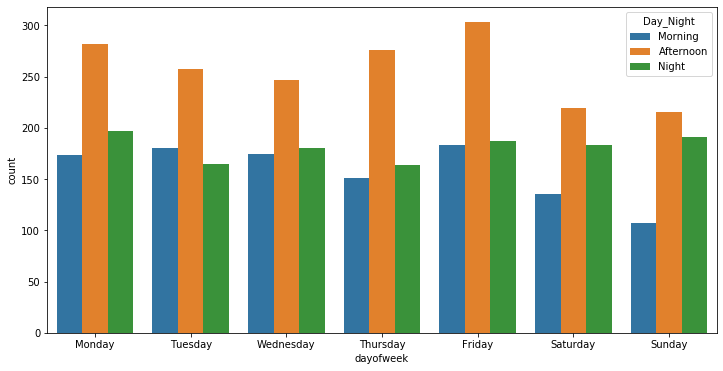

In [32]:
mask=cl_2018["Category Description"]=="Burglary" 
cl_2018_b = cl_2018[mask]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="dayofweek", hue="Day_Night",data=cl_2018_b, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],hue_order =["Morning","Afternoon","Night"])


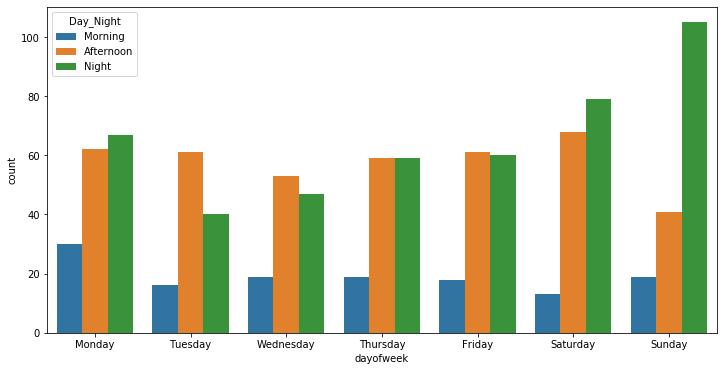

In [33]:
mask=cl_2018["Category Description"]=="Robbery" 
cl_2018_r = cl_2018[mask]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="dayofweek", hue="Day_Night",data=cl_2018_r, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],hue_order = ["Morning","Afternoon","Night"])


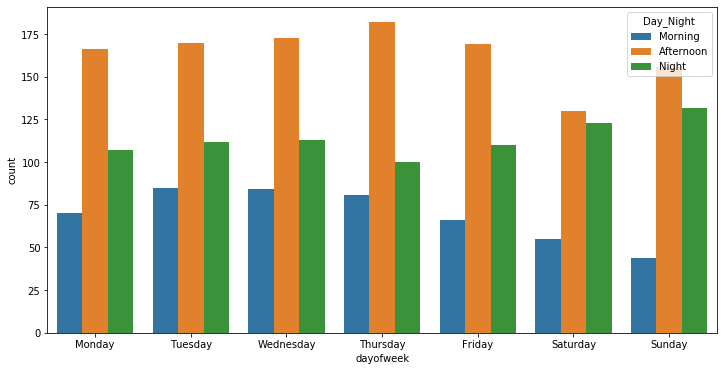

In [34]:
mask=cl_2018["Category Description"]=="Auto Theft" 
cl_2018_at = cl_2018[mask]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="dayofweek", hue="Day_Night",data=cl_2018_at, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],hue_order = ["Morning","Afternoon","Night"])


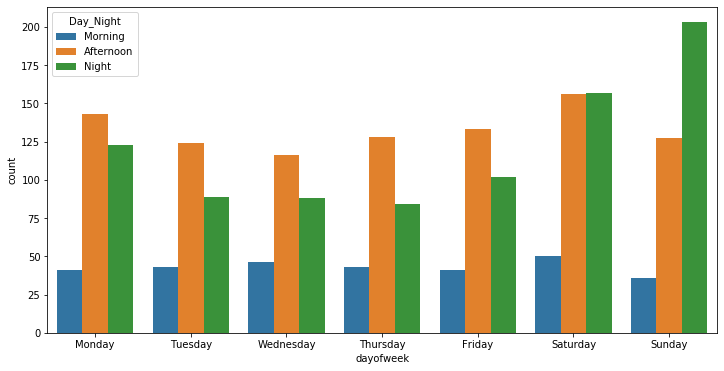

In [35]:
mask=cl_2018["Category Description"]=="Aggravated Assault" 
cl_2018_aa = cl_2018[mask]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="dayofweek", hue="Day_Night",data=cl_2018_aa, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],hue_order = ["Morning","Afternoon","Night"])


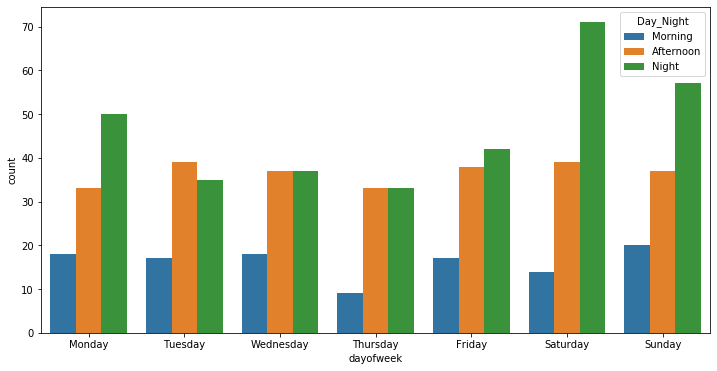

In [36]:
mask=cl_2018["Category Description"]=="Rape" 
cl_2018_rape = cl_2018[mask]
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="dayofweek", hue="Day_Night",data=cl_2018_rape, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],hue_order = ["Morning","Afternoon","Night"])


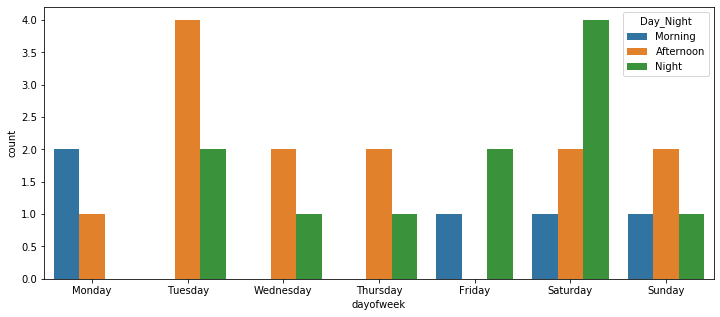

In [37]:
mask=cl_2018["Category Description"]=="Murder" 
cl_2018_m = cl_2018[mask]
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="dayofweek", hue="Day_Night",data=cl_2018_m, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],hue_order =["Morning","Afternoon","Night"])


C:\Users\sayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


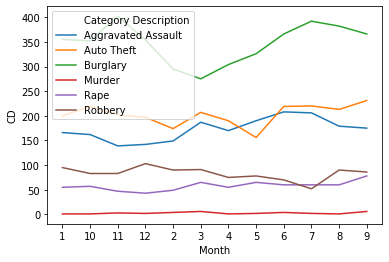

In [38]:
cl_2018_extra = cl_2018
cl_2018_extra["CD"] = cl_2018["Category Description"]
cl_2018_extra = cl_2018_extra.groupby(["Month","Category Description"])["CD"].agg('count').reset_index()
mask = cl_2018_extra["Category Description"] == "Theft"
cl_2018_extra_mask = cl_2018_extra[-mask]

ax = sns.lineplot(x="Month", y="CD", data=cl_2018_extra_mask,hue ="Category Description")

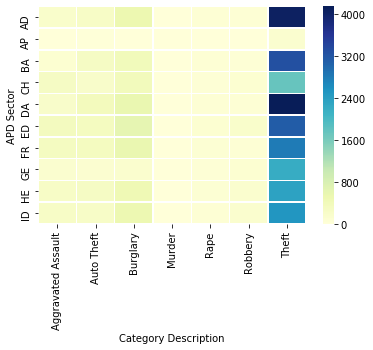

In [39]:
sns.heatmap(pd.crosstab(cl_2018["APD Sector"],cl_2018["Category Description"]).iloc[1:],linewidths=0.5,cmap="YlGnBu")

In [40]:
cl_2018
pd.crosstab(cl_2018["APD Sector"],cl_2018["Category Description"]).idxmax()

Category Description
Aggravated Assault    ED
Auto Theft            DA
Burglary              ED
Murder                ED
Rape                  ED
Robbery               ED
Theft                 DA
dtype: object

In [41]:
cl_2017 = cl[cl["Occurred_year"]=="2017"]
pd.crosstab(cl_2017["APD Sector"],cl_2017["Category Description"]).idxmax()

Category Description
Aggravated Assault    ED
Auto Theft            ED
Burglary              ED
Murder                ED
Rape                  ED
Robbery               ED
Theft                 DA
dtype: object

In [42]:
cl_2016 = cl[cl["Occurred_year"]=="2016"]
pd.crosstab(cl_2016["APD Sector"],cl_2016["Category Description"]).idxmax()

Category Description
Aggravated Assault    ED
Auto Theft            HE
Burglary              ED
Murder                ED
Rape                  ED
Robbery               ED
Theft                 DA
dtype: object

In [43]:
cl_2015 = cl[cl["Occurred_year"]=="2015"]
pd.crosstab(cl_2016["APD Sector"],cl_2016["Category Description"]).idxmax()

Category Description
Aggravated Assault    ED
Auto Theft            HE
Burglary              ED
Murder                ED
Rape                  ED
Robbery               ED
Theft                 DA
dtype: object

In [44]:
pd.crosstab(cl_2018["Zip Code"],cl_2018["Category Description"]).idxmax()

Category Description
Aggravated Assault    78741.0
Auto Theft            78741.0
Burglary              78758.0
Murder                78723.0
Rape                  78741.0
Robbery               78741.0
Theft                 78753.0
dtype: float64

In [45]:
cl_2018_n = cl_2018.drop(columns=["CD","Report Time","Report Date","Occurred Date","Occurred Time","Occurred_year","Month","Day"])
cl_2018_n = cl_2018_n[cl_2018_n["Month_names"]<7]
cl_2018_n 

,APD Sector,Zip Code,Location Type,Category Description,Month_names,Day_Night,dayofweek
40877,ID,78723.0,RESIDENCE / HOME,Aggravated Assault,6,Night,Saturday
40878,HE,78741.0,PARKING LOTS / GARAGE,Auto Theft,6,Night,Saturday
40879,DA,78749.0,RESIDENCE / HOME,Burglary,6,Night,Saturday
40880,AD,78750.0,ABANDONED/CONDEMNED STRUCTURE,Theft,6,Night,Saturday
40881,GE,78703.0,RESIDENCE / HOME,Aggravated Assault,6,Night,Saturday
40882,GE,78701.0,BAR / NIGHT CLUB,Theft,6,Night,Saturday
40883,ID,78723.0,OTHER / UNKNOWN,Theft,6,Night,Saturday
40884,FR,78748.0,RESIDENCE / HOME,Auto Theft,6,Night,Saturday
40885,AD,78759.0,PARKING LOTS / GARAGE,Theft,6,Night,Saturday
40886,FR,78745.0,RESIDENCE / HOME,Theft,6,Night,Saturday


In [46]:
from patsy import dmatrices
%pylab inline
# cl_2018_n["Violent Crime"] = cl_2018_n["Category Description"]

def con(s):
    if s == "Aggravated Assault"or s=="Rape":
        z=1
    else:
        z=0

    return z 

cl_2018_n["target"]= cl_2018_n["Category Description"].map(con)
a = cl_2018_n["target"].value_counts().sum()
cl_2018_n["target"].value_counts()/a

Populating the interactive namespace from numpy and matplotlib


C:\Users\sayes\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


0    0.916475
1    0.083525
Name: target, dtype: float64